In [ ]:
!pip install -r requirements.txt
!curl -OL https://huggingface.co/jinseokim/stable-diffusion-pytorch-data/resolve/main/data.v20221029.tar
!tar -xf data.v20221029.tar

100%|██████████| 20/20 [01:58<00:00,  5.91s/it]


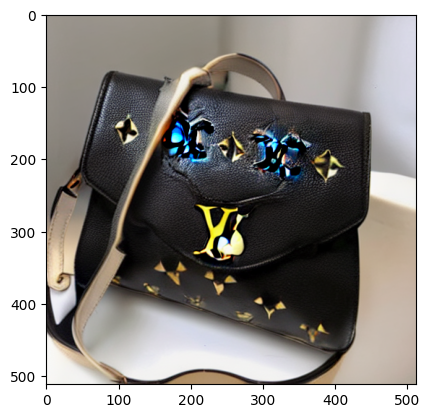

In [1]:
#@title Preload models (takes about ~20 seconds on default settings)
from stable_diffusion_pytorch import model_loader
from stable_diffusion_pytorch import pipeline
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
%matplotlib inline
models = model_loader.preload_models('cpu')

#Positive prompt
prompt = "a chic black LV bag"  #@param { type: "string" }
prompts = [prompt]

#Negative prompt
uncond_prompt = "" #@param { type: "string" }
uncond_prompts = [uncond_prompt] if uncond_prompt else None

#Generation parameters
device = 'cpu' #@param {"cpu", "cuda", "mps"]
strength = 0.8  #@param { type:"slider", min: 0, max: 1, step: 0.01 }
do_cfg = True  #@param { type: "boolean" }
cfg_scale = 7.5  #@param { type:"slider", min: 1, max: 14, step: 0.5 }
height = 512  #@param { type: "integer" }
width = 512  #@param { type: "integer" }
sampler = "k_lms"  #@param ["k_lms", "k_euler", "k_euler_ancestral"]
n_inference_steps = 20  #@param { type: "integer" }

use_seed = False  #@param { type: "boolean" }
if use_seed:
    seed = 42  #@param { type: "integer" }
else:
    seed = None

image = pipeline.generate(prompts=prompts, uncond_prompts=uncond_prompts,
                  input_images=[], strength=strength,
                  do_cfg=do_cfg, cfg_scale=cfg_scale,
                  height=height, width=width, sampler=sampler,
                  n_inference_steps=n_inference_steps, seed=seed,
                  models=models, device=device, idle_device='cpu')[0]

imshow(np.asarray(image))